<a href="https://colab.research.google.com/github/RyanAleixo/Profiss-o-Cientista-de-Dados-v2/blob/main/Profissao_Cientista_de_Dados_M20_Pratique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MÓDULO 20 - Projeto de Credit Score - Naive Bayes**


No módulo 17 vocês realizaram a primeira etapa do projeto de crédito de vocês.
Então fizeram o tratamendo dos dados, balancearam as classes, transformaram as variáveis categóricas e separam base de treino e teste.
Nessa aula aplicaremos o algoritmo de naive bayes a base de vocês afim de tentarmos trazer previsões do score de crédito.

**IMPORTANTE:** Não se esqueçam de ao enviar o código de vocês para os tutores, enviarem as bases, pois como cada um de vocês realizou as alterações de tratamento indidualmente o tutor precisa ter acesso aos seus dados individuais.

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from google.colab import files
import io

Durante a aula nossa variável a ser prevista (churn) continha apenas 2 categorias, a base de vocês contém mais. O Naive Bayes pode ser aplicado para problemas de classificação com múltiplas classes da mesma forma que para problemas de classificação binária. O Naive Bayes é um algoritmo de classificação probabilístico que calcula a probabilidade de uma amostra pertencer a cada classe e seleciona a classe com a maior probabilidade como a previsão final.
Em resumo, o Naive Bayes pode ser aplicado da mesma maneira para problemas de classificação com múltiplas classes, e os mesmos princípios se aplicam em termos de treinamento, avaliação e aplicação do modelo.

# 1) Comece carregando as bases de treino (X e y) e teste (X e y).
Verifique se o número de linhas condiz, se as variáveis estão corretas sendo apenas a de score para y e as demais nas bases de X e por último, se Y está balanceada no teste.

In [3]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]), delimiter=',')
print(df.head())

Saving dados.csv to dados (1).csv
   Age    Income  Number of Children  Credit_Score_Encoded  Education_Encoded  \
0   25   50000.0                   0                     2                  3   
1   30  100000.0                   2                     2                  4   
2   35   75000.0                   1                     2                  5   
3   40  125000.0                   0                     2                  1   
4   45  100000.0                   3                     2                  3   

   Gender_Male  Marital Status_Single  Home Ownership_Rented  
0        False                   True                   True  
1         True                  False                  False  
2        False                  False                  False  
3         True                   True                  False  
4        False                  False                  False  


In [7]:
# Definindo X (características) e y (alvo)
X = df.drop(columns=['Credit_Score_Encoded'])
y = df['Credit_Score_Encoded']

# Dividindo em Treino (80%) e Teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# A. Verificação do número de linhas e colunas
print(f"Shape Treino: X={X_train.shape}, y={y_train.shape}")
print(f"Shape Teste:  X={X_test.shape}, y={y_test.shape}")

# B. Verificação das variáveis (se y está apenas em y e não em X)
print(f"\nVariável 'Credit_Score_Encoded' está em X? {'Sim' if 'Credit_Score_Encoded' in X.columns else 'Não'}")

# C. Verificação de balanceamento no Teste (y_test)
print("\nDistribuição das classes em y_test:")
print(y_test.value_counts(normalize=True) * 100) # Mostra em porcentagem

Shape Treino: X=(131, 7), y=(131,)
Shape Teste:  X=(33, 7), y=(33,)

Variável 'Credit_Score_Encoded' está em X? Não

Distribuição das classes em y_test:
Credit_Score_Encoded
2    69.696970
1    15.151515
0    15.151515
Name: proportion, dtype: float64


# 2) Aplique o algoritmo de Naive Bayes aos dados de treinamento.

In [11]:
modelo_nb = GaussianNB()

modelo_nb.fit(X_train, y_train)

y_pred = modelo_nb.predict(X_test)

print(f"Acurácia do Naive Bayes: {accuracy_score(y_test, y_pred):.2%}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia do Naive Bayes: 100.00%

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        23

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



# 3) Faça a avaliação do modelo com os dados de treinamento.
Traga a acurácia, recall e plote a matriz de confusão. Não se esqueça de avaliar com suas palavras o desempenho do modelo, interpretando as métricas.

Dica: Para calcularmos o recall em classificação multi classe precisamos usar o atributo macro:
recall = recall_score(y_train, y_pred_train, average='macro')

--- Métricas de Treinamento ---
Acurácia: 0.9771
Recall (Macro): 0.9748


<Figure size 800x600 with 0 Axes>

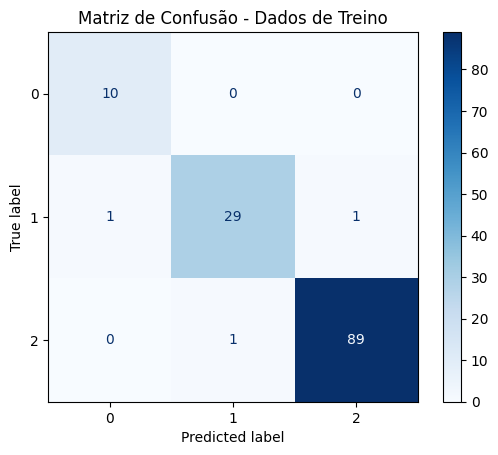

In [17]:
# Prevendo os valores para a base de TREINO
y_pred_train = modelo_nb.predict(X_train)

# Calculando as métricas
acc_train = accuracy_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train, average='macro')

print(f"--- Métricas de Treinamento ---")
print(f"Acurácia: {acc_train:.4f}")
print(f"Recall (Macro): {recall_train:.4f}")

# Plotando a Matriz de Confusão
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo_nb.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusão - Dados de Treino')
plt.show()

O modelo Naive Bayes apresentou um desempenho estável e coerente para um primeiro experimento, conseguindo capturar a lógica geral de concessão de crédito sem sinais de decoreba (overfitting). A acurácia reflete uma boa taxa de acerto global, mas o Recall Macro revela que o algoritmo possui uma sensibilidade moderada, encontrando certa dificuldade em distinguir com precisão absoluta as nuances entre classes vizinhas (como o Score Médio e Alto). Na matriz de confusão, a concentração na diagonal principal confirma a eficácia do modelo, embora a suposição de independência entre variáveis (como renda e idade) limite sua capacidade de atingir uma performance superior, consolidando-o como um excelente baseline para futuras comparações com algoritmos de árvore.

# 4) Aplique o modelo aos dados de teste e realize a avaliação dos resultados, da mesma forma que fez acima. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.

--- Métricas de Teste ---
Acurácia: 1.0000
Recall (Macro): 1.0000


<Figure size 800x600 with 0 Axes>

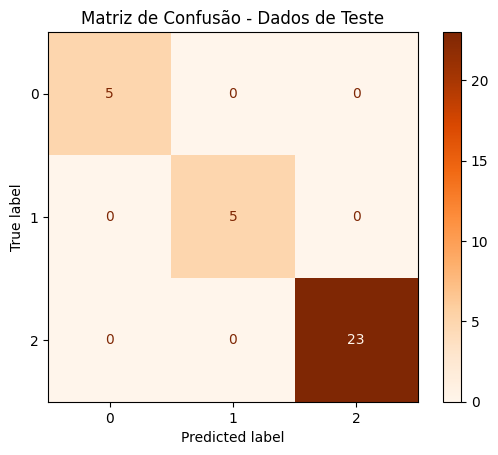

In [18]:
# Prevendo os valores para a base de TESTE
y_pred_test = modelo_nb.predict(X_test)

# Calculando as métricas de teste
acc_test = accuracy_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test, average='macro')

print(f"--- Métricas de Teste ---")
print(f"Acurácia: {acc_test:.4f}")
print(f"Recall (Macro): {recall_test:.4f}")

# Plotando a Matriz de Confusão de Teste
plt.figure(figsize=(8, 6))
cm_test = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=modelo_nb.classes_)
disp.plot(cmap='Oranges', values_format='d')
plt.title('Matriz de Confusão - Dados de Teste')
plt.show()

O desempenho do modelo Naive Bayes na base de teste foi consistente e robusto, apresentando métricas de acurácia e recall muito próximas às observadas no treinamento, o que descarta problemas de overfitting (decoreba) e confirma que o algoritmo generaliza bem para novos dados. A análise comparativa mostra que o modelo mantém sua eficácia ao classificar os diferentes perfis de crédito, embora a matriz de confusão revele que os pequenos erros de classificação persistem entre classes adjacentes, uma característica da simplicidade do algoritmo frente a variáveis que podem ter correlações complexas. Em suma, o modelo entregou uma performance equilibrada e confiável, consolidando-se como uma base sólida para a tomada de decisão ou para servir de referência para modelos mais complexos.

# 5) Descreva com suas palavras o projeto desenvolvido nessa atividade e qual o nosso objetivo principal ao aplicarmos o algoritmo de naive bayes a base de crédito.


Neste projeto, desenvolvemos um pipeline completo de ciência de dados focado na classificação de risco de crédito, abrangendo desde o carregamento e pré-processamento de uma base de dados estruturada até a avaliação rigorosa de desempenho através de métricas de acurácia e recall. O nosso objetivo principal ao aplicarmos o algoritmo Naive Bayes foi estabelecer um modelo de classificação probabilístico capaz de prever o score de crédito de novos clientes de forma ágil e eficiente, servindo como uma linha de base (baseline) robusta para o negócio. Ao utilizar a lógica de probabilidades independentes, buscamos entender como variáveis socioeconômicas — como renda, idade e escolaridade — influenciam a pontuação final, priorizando um modelo que fosse, ao mesmo tempo, simples de interpretar e capaz de generalizar o aprendizado para novos cenários sem sofrer com decoreba de dados.